In [129]:
import warnings
warnings.filterwarnings("ignore")

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [131]:
loandata=pd.read_csv("loan.csv")

In [132]:
loandata.iloc[0:5, 0:15]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified


In [133]:
loandata.shape

(39717, 111)

In [134]:
loandata.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [135]:
loandata[["verification_status"]].value_counts()

verification_status
Not Verified           16921
Verified               12809
Source Verified         9987
Name: count, dtype: int64

In [136]:
loandata[loandata["verification_status"].isin(["Verified"])].iloc[0:10, 4:17]

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid
9,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off
18,6000.00000,36 months,11.71%,198.46,B,B3,Connection Inspection,1 year,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid
20,19142.16108,60 months,15.27%,484.63,C,C4,Archdiocese of Galveston Houston,3 years,RENT,43370.0,Verified,Dec-11,Fully Paid
21,21000.00000,36 months,12.42%,701.73,B,B4,Osram Sylvania,10+ years,RENT,105000.0,Verified,Dec-11,Charged Off
25,15000.00000,36 months,9.91%,483.38,B,B1,Winfield Pathology Consultants,2 years,MORTGAGE,92000.0,Verified,Dec-11,Fully Paid
31,31825.00000,36 months,7.90%,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,MORTGAGE,75000.0,Verified,Dec-11,Fully Paid
32,9975.00000,60 months,15.96%,242.97,C,C5,US Legal Support,2 years,RENT,29120.0,Verified,Dec-11,Current
33,5000.00000,36 months,8.90%,158.77,A,A5,Good Samaritan Society,2 years,RENT,24044.0,Verified,Dec-11,Fully Paid
37,15000.00000,36 months,7.90%,469.36,A,A4,Gateway Hospice,1 year,RENT,45000.0,Verified,Dec-11,Fully Paid


In [137]:
nullvalues=loandata.isnull().sum()/loandata.shape[0]*100

In [138]:
nullvalues.tail(52)

open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl                       100.000000
inq_last_12m                      100.000000
acc_open_past_24mths              100.000000
avg_cur_bal                       100.000000
bc_open_to_buy                    100.000000
bc_util                           100.000000
chargeoff_within_12_mths            0.140998
delinq_amnt                         0.000000
mo_sin_old_il_acct                100.000000
mo_sin_old

###It is a big data so,high amount of null values can impact the data analysis so,delete the null values which are greater than 30%

In [139]:
loandata.drop(["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","mths_since_last_major_derog","annual_inc_joint","dti_joint","verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_acc_6m","open_il_6m","open_il_12m","open_il_24m", "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util",
"total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy",
"bc_util",'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75','tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit'],axis=1,inplace=True)

In [140]:
loandata.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [141]:
loandata.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [142]:
loandata.shape

(39717, 53)

##Half of the columns contains the null values see the variation initially it contains 111 columns but now it is decreased to 53 after deleting null values columns 

##Now,Let's find  the count of the loan_verification

In [143]:
loandata.verification_status.value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

# UNIVARIATE ANALYSIS

<Axes: xlabel='loan_status'>

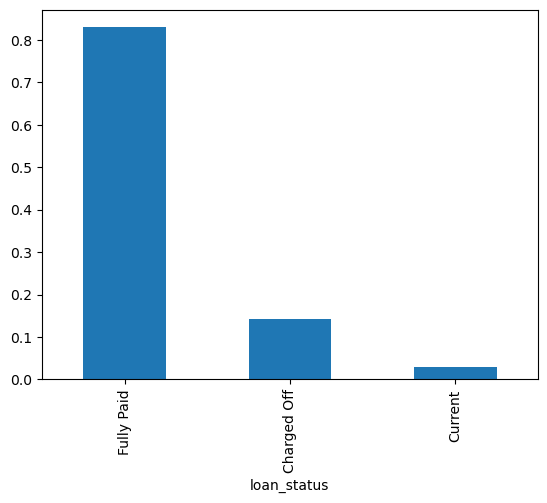

In [144]:
loandata.loan_status.value_counts(normalize=True).plot.bar()

# Loan status VS Annual Income

In [145]:
loandata.annual_inc.max()

6000000.0

In [146]:
loandata.annual_inc.min()

4000.0

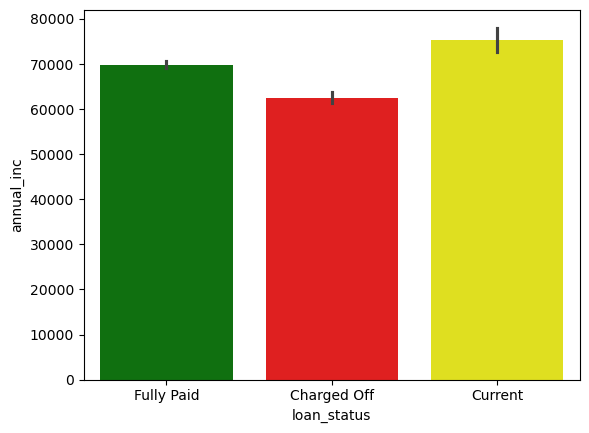

In [147]:
palette_colors = {"Fully Paid": "green", "Charged Off": "red", "Current": "yellow"}
sns.barplot(data=loandata,x="loan_status",y="annual_inc",palette=palette_colors)
plt.show()

#By the above bar graph we can annalyse that the annual income>=70000 are fully-paid or currently paying but below 70000 are charged off

# Charged off  vs grade

In [148]:
# Filter the data where loan_status is "Charged Off"
charged_off_data = loandata[loandata["loan_status"] == "Charged Off"]

# Group by grade and get the count of "Charged Off" loans for each grade
grade_counts = charged_off_data.groupby("grade")["loan_status"].count().reset_index()

# Rename the columns for clarity
grade_counts.rename(columns={"loan_status": "count"}, inplace=True)

# Display the counts
print(grade_counts)

  grade  count
0     A    602
1     B   1425
2     C   1347
3     D   1118
4     E    715
5     F    319
6     G    101


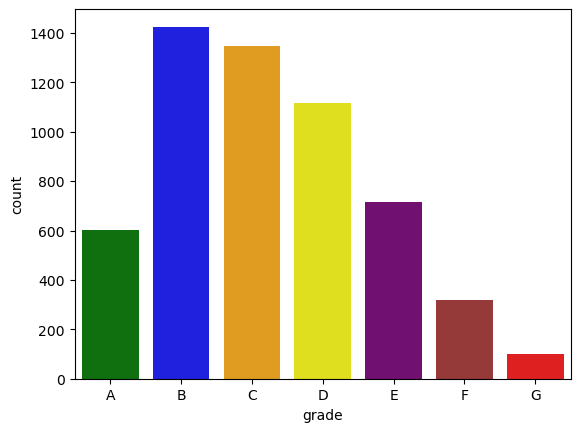

In [149]:
palette_colors = {"A": "green", "B": "blue", "C": "orange","D":"yellow","E":"purple","F":"brown","G":"red"}
sns.barplot(data=grade_counts,x="grade",y="count",palette=palette_colors)
plt.show()

# Fully Paid vs Grade

In [150]:
fully_paid_data = loandata[loandata["loan_status"] == "Fully Paid"]

# Group by grade and get the count of "Charged Off" loans for each grade
fully_paid_counts = fully_paid_data.groupby("grade")["loan_status"].count().reset_index()

# Display the counts
print(fully_paid_counts)

  grade  loan_status
0     A         9443
1     B        10250
2     C         6487
3     D         3967
4     E         1948
5     F          657
6     G          198


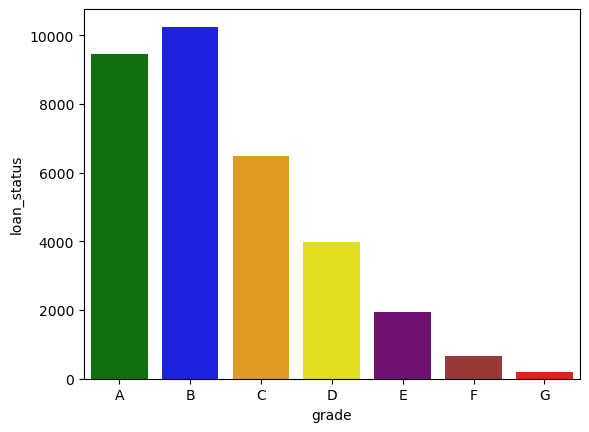

In [151]:
palette_colors = {"A": "green", "B": "blue", "C": "orange","D":"yellow","E":"purple","F":"brown","G":"red"}
sns.barplot(data=fully_paid_counts,x="grade",y="loan_status",palette=palette_colors)
plt.show()

# Charged Off VS Annual Income

In [152]:
charged_off_data.annual_inc.min()

4080.0

In [153]:
charged_off_data.annual_inc.max()

1250000.0

In [154]:
def func(loandata):
    charged_off_data.loc[(charged_off_data["annual_inc"] >= 4000) & (charged_off_data["annual_inc"] <=50000), "annual_inc_range"] = "very low"
    charged_off_data.loc[(charged_off_data["annual_inc"] > 50000) & (charged_off_data["annual_inc"] <=100000), "annual_inc_range"] = "low"
    charged_off_data.loc[(charged_off_data["annual_inc"] > 100000) & (charged_off_data["annual_inc"] <= 1000000), "annual_inc_range"] = "medium"
    charged_off_data.loc[(charged_off_data["annual_inc"] > 1000000) & (charged_off_data["annual_inc"] <=6000000), "annual_inc_range"] = "high"
    
    return charged_off_data

result = func(loandata)


In [155]:
annual_chargeoff_data = charged_off_data.groupby("annual_inc_range")["loan_status"].count().reset_index()

In [156]:
annual_chargeoff_data

,annual_inc_range,loan_status
0,high,1
1,low,2422
2,medium,591
3,very low,2613


<Axes: xlabel='annual_inc_range', ylabel='loan_status'>

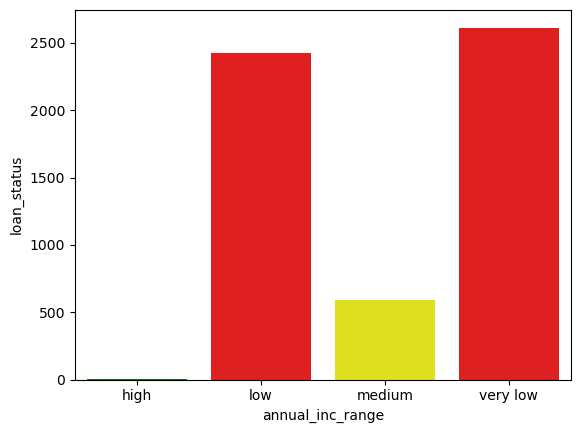

In [157]:
palette_colors={"high":"green","low":"red","very low":"red","medium":"yellow"}
sns.barplot(data=annual_chargeoff_data,x="annual_inc_range",y="loan_status",palette=palette_colors)

# Fully paid VS Annual Income

In [158]:
fully_paid_data.annual_inc.min()

4000.0

In [159]:
fully_paid_data.annual_inc.max()

6000000.0

In [160]:
def func(loandata):
    fully_paid_data.loc[(fully_paid_data["annual_inc"] >4000) & (fully_paid_data["annual_inc"] <=100000), "annual_inc_range"] = "low"
    fully_paid_data.loc[(fully_paid_data["annual_inc"] > 100000) & (fully_paid_data["annual_inc"] <=5000000), "annual_inc_range"] = "medium"
    fully_paid_data.loc[(fully_paid_data["annual_inc"] > 1000000) & (fully_paid_data["annual_inc"] <=6000000), "annual_inc_range"] = "high"
    
    return fully_paid_data

result = func(loandata)

In [161]:
annualinc_fullypaid_data=fully_paid_data.groupby("annual_inc_range")["loan_status"].count().reset_index()

In [162]:
annualinc_fullypaid_data

,annual_inc_range,loan_status
0,high,13
1,low,28060
2,medium,4876


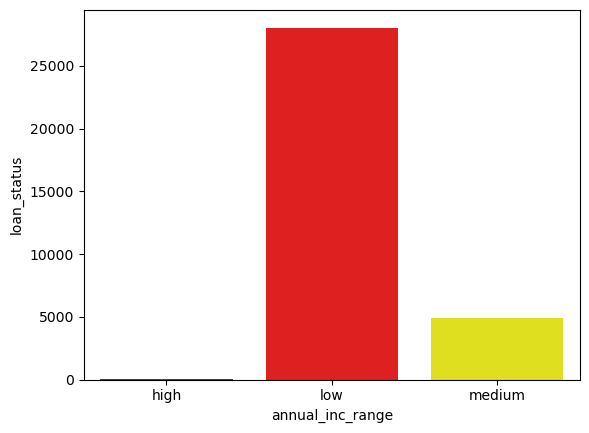

In [163]:
palette_colors={"high":"green","low":"red","medium":"yellow"}
sns.barplot(data=annualinc_fullypaid_data,x="annual_inc_range",y="loan_status",palette=palette_colors)
plt.show()

This gives a different pattern because the low income people are high count in paying the loan.

# Charged off VS Home Ownership

In [164]:
chargedoff_home_data=charged_off_data.groupby("home_ownership")["loan_status"].count().reset_index()

In [165]:
chargedoff_home_data

,home_ownership,loan_status
0,MORTGAGE,2327
1,OTHER,18
2,OWN,443
3,RENT,2839


<Axes: xlabel='home_ownership', ylabel='loan_status'>

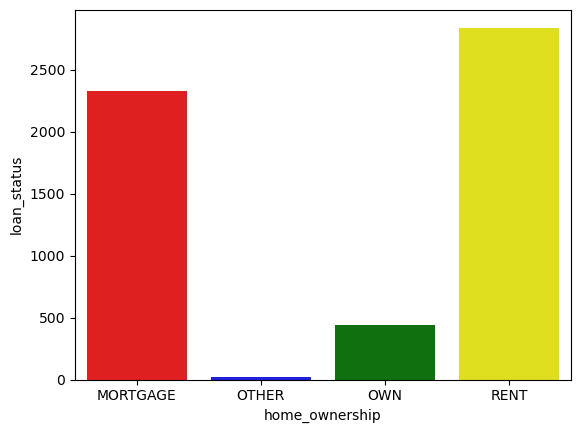

In [166]:
palette_colors={"MORTGAGE":"Red","OWN":"green","RENT":"yellow","OTHER":"blue"}
sns.barplot(data=chargedoff_home_data,x="home_ownership",y="loan_status",palette=palette_colors)

There are more people "default" in the mortgage field

# Fully paid VS Home ownership

In [167]:
fullypaid_home_data=fully_paid_data.groupby("home_ownership")["loan_status"].count().reset_index()

In [168]:
fullypaid_home_data

,home_ownership,loan_status
0,MORTGAGE,14694
1,NONE,3
2,OTHER,80
3,OWN,2532
4,RENT,15641


<Axes: xlabel='home_ownership', ylabel='loan_status'>

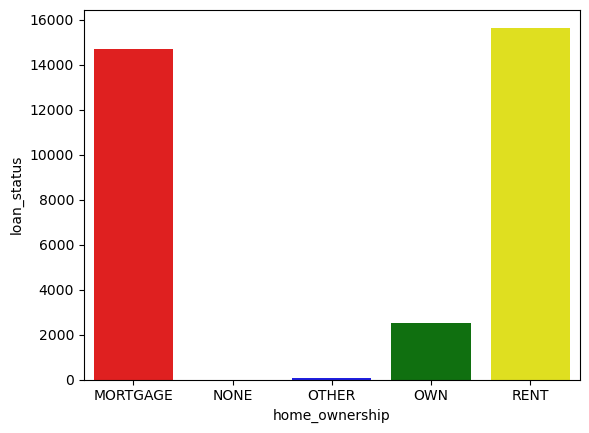

In [169]:
palette_colors={"MORTGAGE":"Red","OWN":"green","RENT":"yellow","OTHER":"blue","NONE":"black"}
sns.barplot(data=fullypaid_home_data,x="home_ownership",y="loan_status",palette=palette_colors)

By this analysis we can clear one thing that is "Home ownership" is not much impact on paying the loan

# Charged off vs Loan Amount

<Axes: xlabel='loan_amnt', ylabel='Density'>

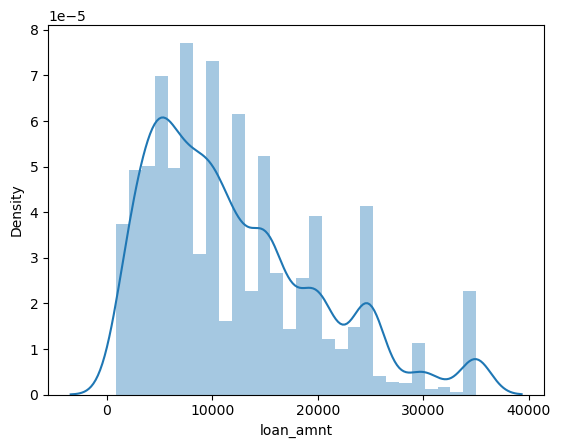

In [170]:
sns.distplot(charged_off_data.loan_amnt)

<Axes: xlabel='term', ylabel='loan_status'>

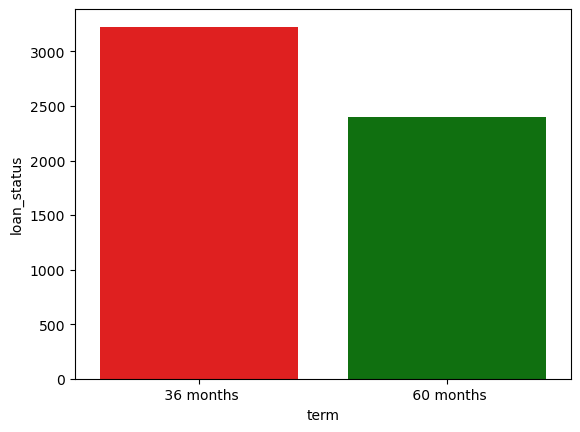

In [171]:
term_charge_data=charged_off_data.groupby("term")["loan_status"].count().reset_index()
sns.barplot(data=term_charge_data,x="term",y="loan_status",palette={"red","green"})

# verified VS  purpose

In [172]:
verified_data=loandata[loandata["verification_status"]=="Verified"]
purpose_verif_data=verified_data.groupby("purpose")["verification_status"].count().reset_index()

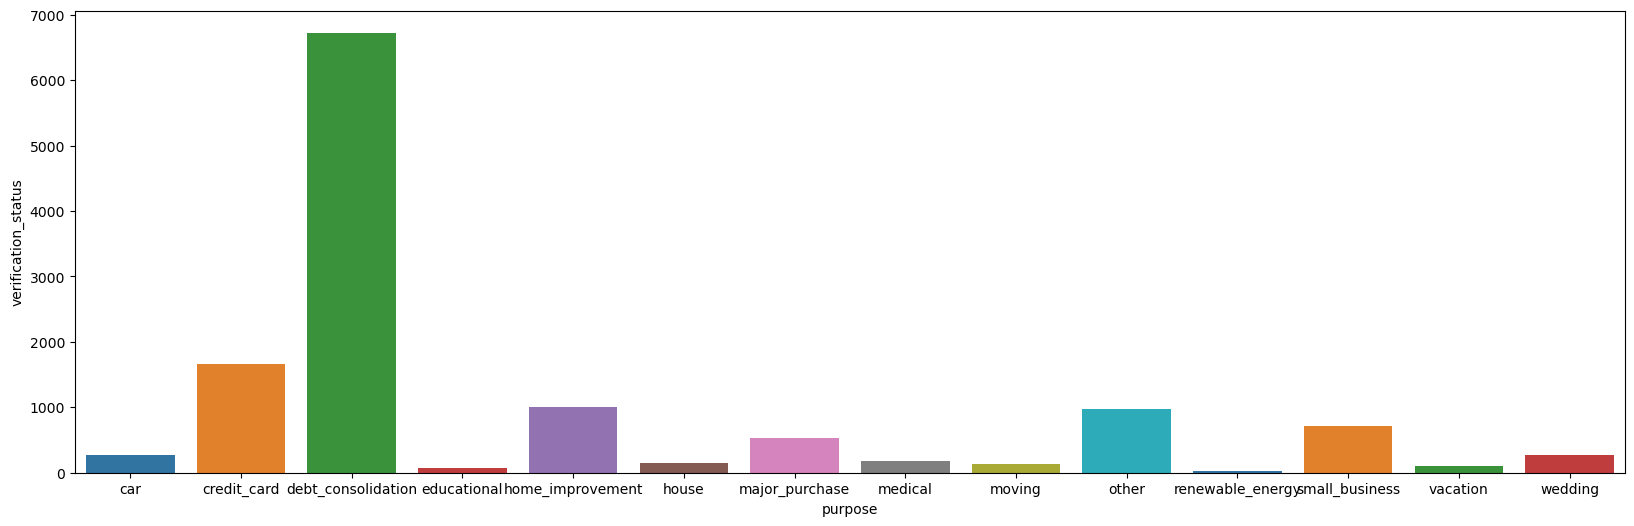

In [173]:
plt.figure(figsize=[20,6])
sns.barplot(data=purpose_verif_data,x="purpose",y="verification_status",palette=sns.color_palette())
plt.show()

# Interest rate vs Charged_off

In [174]:
charged_off_data["int_rate"]=charged_off_data.int_rate.str.replace("%","")

In [175]:
charged_off_data["int_rate"]=charged_off_data.int_rate.astype(float)

In [176]:
charged_off_data.int_rate.min()

5.42

In [177]:
charged_off_data.int_rate.max()

24.4

In [178]:
charged_off_data.int_rate.info()

<class 'pandas.core.series.Series'>
Index: 5627 entries, 1 to 39688
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
5627 non-null   float64
dtypes: float64(1)
memory usage: 87.9 KB


In [179]:
charged_off_data.int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

In [180]:
def func(charged_off_data):
    charged_off_data.loc[(charged_off_data["int_rate"] >=5) & (charged_off_data["int_rate"] <=10), "int_rate_range"] = "low"
    charged_off_data.loc[(charged_off_data["int_rate"] >10) & (charged_off_data["int_rate"] <=15), "int_rate_range"] = "medium"
    charged_off_data.loc[(charged_off_data["int_rate"] >15) & (charged_off_data["int_rate"] <=25), "int_rate_range"] = "high"

    return charged_off_data

result = func(charged_off_data)

In [181]:
interest_chargeoff_data=charged_off_data.groupby("int_rate_range")["loan_status"].count().reset_index()

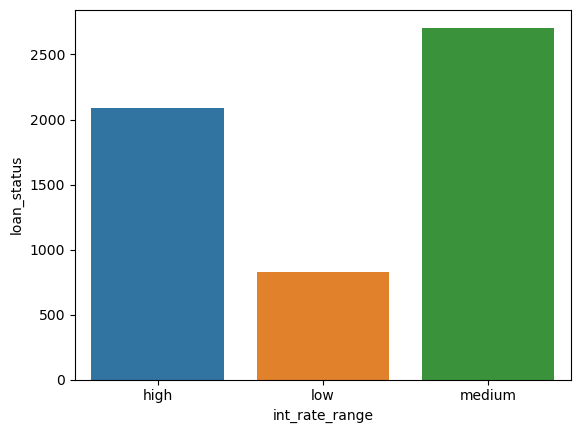

In [182]:
sns.barplot(data=interest_chargeoff_data,x="int_rate_range",y="loan_status",palette=sns.color_palette())
plt.show()

# Fully paid vs Interest rate

In [183]:
fully_paid_data["int_rate"]=fully_paid_data.int_rate.str.replace("%","")

In [184]:
fully_paid_data["int_rate"]=fully_paid_data.int_rate.astype(float)

In [185]:
fully_paid_data.int_rate.min()

5.42

In [186]:
fully_paid_data.int_rate.max()

24.11

In [187]:
fully_paid_data.int_rate.describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64

In [188]:
def func(fully_paid_data):
    fully_paid_data.loc[(fully_paid_data["int_rate"] >=5) & (fully_paid_data["int_rate"] <=10), "int_rate_range"] = "low"
    fully_paid_data.loc[(fully_paid_data["int_rate"] >10) & (fully_paid_data["int_rate"] <=15), "int_rate_range"] = "medium"
    fully_paid_data.loc[(fully_paid_data["int_rate"] >15) & (fully_paid_data["int_rate"] <=25), "int_rate_range"] = "high"

    return fully_paid_data

result = func(fully_paid_data)

In [189]:
interest_fullypaid_data=fully_paid_data.groupby("int_rate_range")["loan_status"].count().reset_index()

<Axes: ylabel='proportion'>

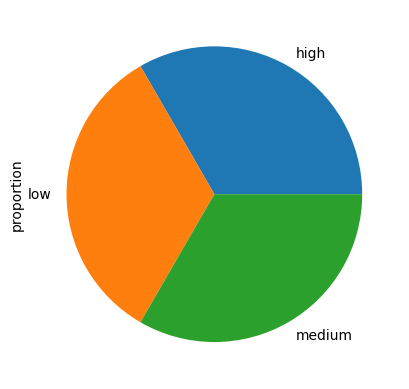

In [190]:
interest_fullypaid_data.int_rate_range.value_counts(normalize=True).plot.pie()

Mostly medium and high interest rate  loans are "default"

In [191]:
from datetime import datetime 
verified_data["issue_d"]=pd.to_datetime(verified_data["issue_d"],format="%b-%y")
verified_data["issue_mnth"]=verified_data["issue_d"].dt.month_name()

In [192]:
month_verify_data=verified_data.groupby("issue_mnth")["verification_status"].count().reset_index()

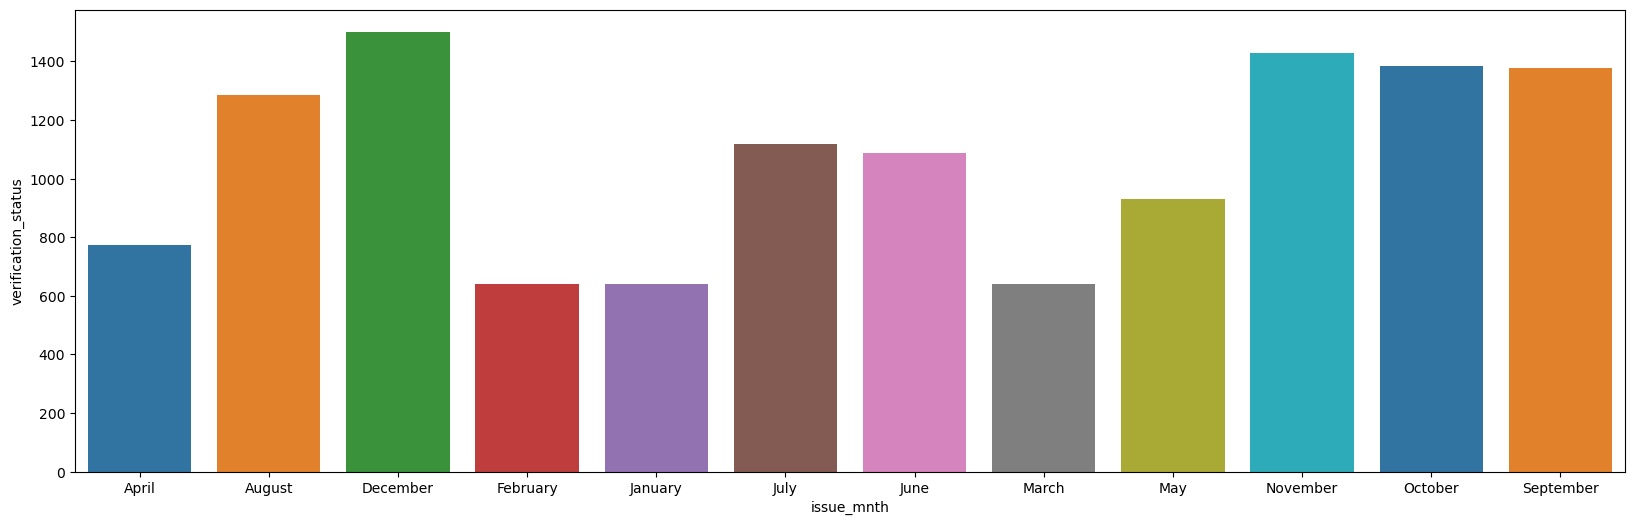

In [193]:
plt.figure(figsize=[20,6])
sns.barplot(data=month_verify_data,x="issue_mnth",y="verification_status",palette=sns.color_palette())
plt.show()

Most of them are verified and issued at the end of the year

# Verified VS Grades

In [194]:
grade_verify_data=verified_data.groupby("grade")["verification_status"].count().reset_index()

<Axes: xlabel='grade', ylabel='verification_status'>

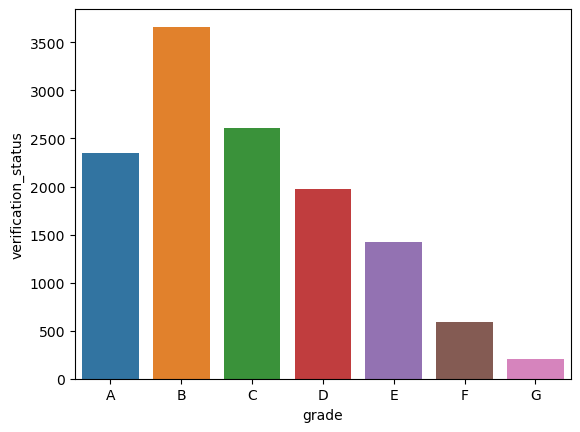

In [195]:
sns.barplot(data=grade_verify_data,x="grade",y="verification_status",palette=sns.color_palette())

A,B,C credit score grades are approved for the loan.

# Loan Status VS Credit Experience

In [196]:
# calulate credit experience from opened date to till now
loandata["earliest_cr_line_years"]=2024-(pd.to_datetime(loandata["earliest_cr_line"],format="%b-%y").dt.year)

In [197]:
loandata["earliest_cr_line_years"].min()

-44

In [198]:
loandata["earliest_cr_line_years"].max()

55

In [199]:
loandata["earliest_cr_line_years"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: earliest_cr_line_years
Non-Null Count  Dtype
--------------  -----
39717 non-null  int32
dtypes: int32(1)
memory usage: 155.3 KB


In [200]:
def func(loandata):
    loandata.loc[(loandata["earliest_cr_line_years"] <=3), "cr_years_range"] = "low"
    loandata.loc[(loandata["earliest_cr_line_years"] >3) & (loandata["earliest_cr_line_years"] <=25), "cr_years_range"] = "medium"
    loandata.loc[(loandata["earliest_cr_line_years"] >25), "cr_years_range"] = "high"

    return loandata

result = func(loandata)

In [201]:
years_verif_data=loandata[loandata["verification_status"] == "Verified"].groupby("cr_years_range")["verification_status"].count().reset_index()  

In [202]:
years_verif_data

,cr_years_range,verification_status
0,high,7935
1,low,34
2,medium,4840


<Axes: xlabel='verification_status', ylabel='cr_years_range'>

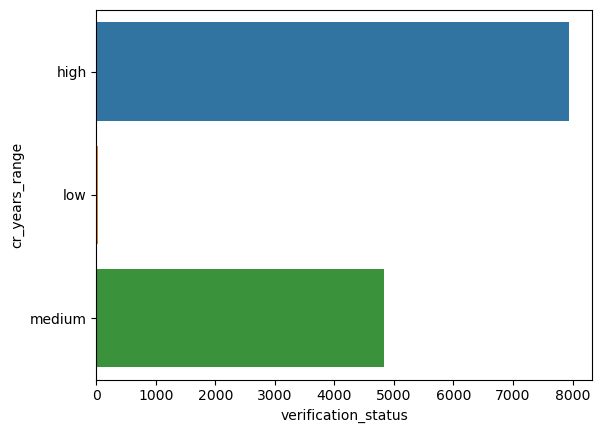

In [203]:
sns.barplot(data=years_verif_data,x="verification_status",y="cr_years_range",palette=sns.color_palette())

# Numeric vs Numeric Analysis

Loan Amount VS Funded Amount

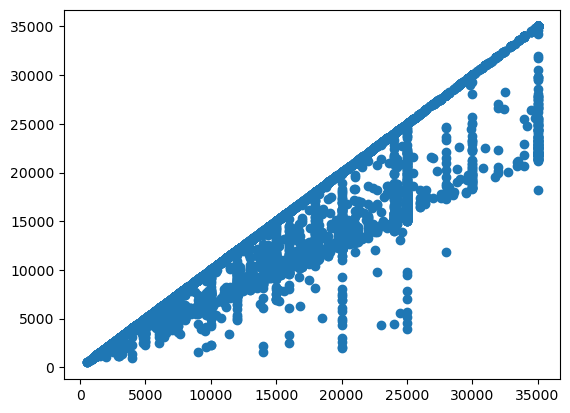

In [204]:
plt.scatter(x=loandata.loan_amnt,y=loandata.funded_amnt)
plt.show()

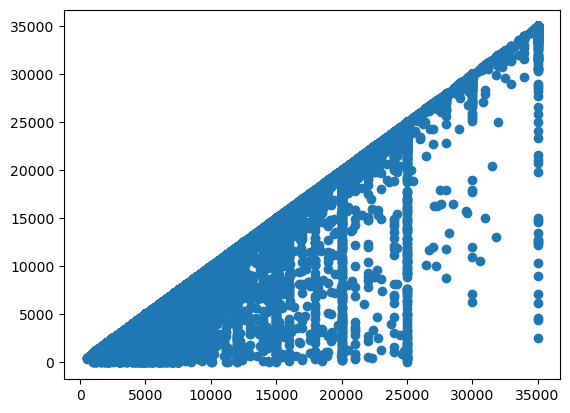

In [205]:
plt.scatter(loandata.funded_amnt,loandata.funded_amnt_inv)

Categorical VS Numerical Variables

In [206]:
loandata["dti"].max()

29.99

In [207]:
def func(loandata):
    loandata.loc[(loandata["dti"] >=0) & (loandata["dti"] <=5),"dti_range"] = "low"
    loandata.loc[(loandata["dti"] >5) & (loandata["dti"] <=15), "dti_range"] = "medium"
    loandata.loc[(loandata["dti"] >20), "dti_range"] = "high"

    return loandata

result = func(loandata)

In [208]:
dti_verif_data=loandata[loandata["verification_status"] == "Verified"].groupby("dti_range")["verification_status"].count().reset_index()  

In [209]:
dti_verif_data

,dti_range,verification_status
0,high,2977
1,low,1339
2,medium,5416


<Axes: xlabel='dti_range', ylabel='verification_status'>

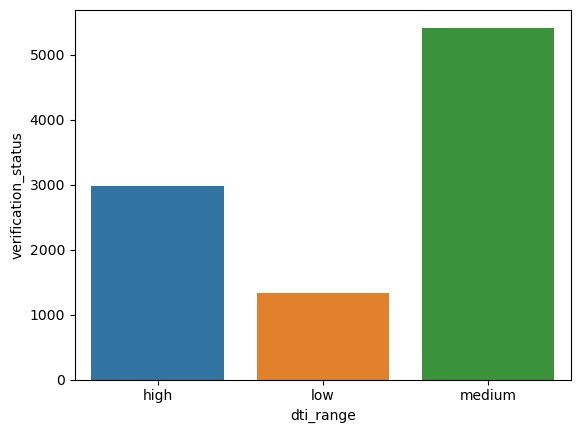

In [210]:
sns.barplot(data=dti_verif_data,x="dti_range",y="verification_status",palette=sns.color_palette())

It is not in  right way  because most of the loans are verified are having high and medium dti range.These loans are may be get "default"

# Delinq in past 2 years vs Verified

In [211]:
delinq_verif_data=loandata[loandata["verification_status"] == "Verified"].groupby("delinq_2yrs")["verification_status"].count().reset_index() 

In [212]:
delinq_verif_data

,delinq_2yrs,verification_status
0,0,11422
1,1,1050
2,2,225
3,3,75
4,4,20
5,5,9
6,6,5
7,7,2
8,9,1


Most of the Verified people are not delinq in 2 years

# Multivariate Analysis

Charged off vs grades vs interest rate ranges

In [213]:
loandata["loanstatus_flag"]=np.where(loandata.loan_status=="Charged Off",1,0)

In [214]:
loandata["int_rate_float"]=loandata.int_rate.str.replace("%","")

In [215]:
loandata["int_rate_float"]=loandata.int_rate_float.astype(float)

In [216]:
loandata.int_rate_float.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate_float
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [217]:
def func(loandata):
    loandata.loc[(loandata["int_rate_float"] >=5) & (loandata["int_rate_float"] <=10), "int_rate_range"] = "low"
    loandata.loc[(loandata["int_rate_float"] >10) & (loandata["int_rate_float"] <=12), "int_rate_range"] = "medium"
    loandata.loc[(loandata["int_rate_float"] >12) & (loandata["int_rate_float"] <=25), "int_rate_range"] = "high"

    return loandata

result = func(loandata)

In [218]:
res=pd.pivot_table(data=loandata,columns="int_rate_range",index="grade",values="loanstatus_flag")

In [219]:
res

int_rate_range,high,low,medium
grade,,,
A,NaN,0.059693,NaN
B,0.134398,0.099303,0.121032
C,0.164946,0.000000,0.199422
D,0.210805,0.000000,0.222222
E,0.251938,0.000000,NaN
F,0.304099,NaN,NaN
G,0.319620,NaN,NaN


<Axes: xlabel='int_rate_range', ylabel='grade'>

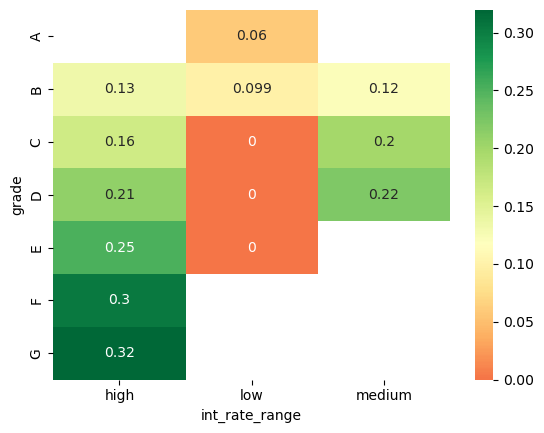

In [220]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)

High interest rate people and D,E,F,G grade people are more likely to be "default"

Grade VS Interest VS Verified

In [232]:
loandata["response_flag"]=np.where(loandata.verification_status=="Verified",1,0)

In [237]:
res1=pd.pivot_table(data=loandata,columns="int_rate_range",index="grade",values="response_flag")

In [238]:
res1

int_rate_range,high,low,medium
grade,,,
A,NaN,0.232821,NaN
B,0.359947,0.261760,0.306654
C,0.333247,0.000000,0.089595
D,0.372497,0.500000,0.000000
E,0.500352,0.000000,NaN
F,0.561487,NaN,NaN
G,0.639241,NaN,NaN


<Axes: xlabel='int_rate_range', ylabel='grade'>

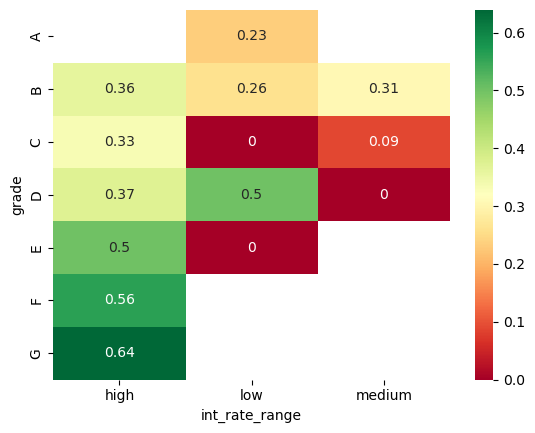

In [239]:
sns.heatmap(res1,annot=True,cmap="RdYlGn")

The loan is verifed for the E,F,G and with high interests.It is might be risky for the company because these type of loans will be having more chances of default

In [241]:
res2=pd.pivot_table(data=loandata,columns="int_rate_range",index="loan_status",values="response_flag")

In [242]:
res2

int_rate_range,high,low,medium
loan_status,,,
Charged Off,0.410078,0.242169,0.300188
Current,0.558894,0.259740,0.510823
Fully Paid,0.374410,0.237681,0.290425


<Axes: xlabel='int_rate_range', ylabel='loan_status'>

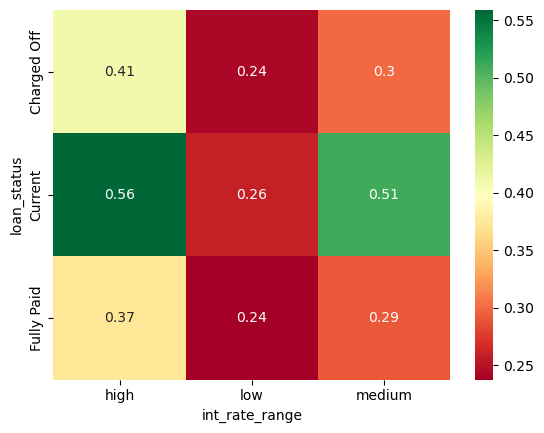

In [243]:
sns.heatmap(res2,annot=True,cmap="RdYlGn")

Rather than fully paid and charged off The company is willing to verify the loan for the "Current" loan status.It cannot be predicted that it will be "defaulted" or not but, By considering other factors it can be possible

# Conclusion

Conclusion:Analysing the default loans makes the company to get less loss.So,I conclude my analysis by discussing some factors
Annual income,Grade,earliest_credit_line,Interest rates plays major role to preict the loan is default or not